In [ ]:
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

# Modular arithmetics

Some applications of modular arithmetics

## Checksums

A checksum is a small-sized datum derived from a block of digital data 
for the purpose of detecting errors that may have been introduced during
its transmission or storage. 

A checksum must be of fixed size. We can use modulo arithmetics to bound the size of
the result. The simplest way is to compute the checksum is to sum values of all 
digits, and then take the modulo. 

In [ ]:
def cksum0(n):
    sum = 0
    while n != 0:
        m = n % 10
        sum += m
        n = n // 10
    return sum % 10

Let's see how even this function distributes the checksums. 

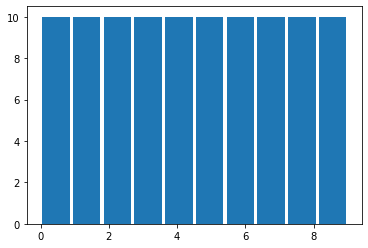

In [ ]:
cksums0 = [cksum0(n) for n in range(100)]
_ = plt.hist(cksums0, rwidth=0.9)

Looks uniform, but is it a good function? We want numbers with just a small error to get different checksums.

In [ ]:
cksum0(2888919), cksum0(2889919), cksum0(28888819), cksum0(7888919)

(5, 6, 2, 0)

So far, so good. Our algorithm detects simple typos. But does it always work well? Here are two examples where it does not work well. In the first two digits are swapped, in the second the error is in two digits.

In [ ]:
print(cksum0(2888919), "|", cksum0(2889819), cksum0(2878929))

5 | 5 5


We can implement the [Luhn's algorithm](https://en.wikipedia.org/wiki/Luhn_algorithm) instead. Luhn's algorithm is the _de facto_ standard to compute the **check digit**.

In [ ]:
def digits(n):
    if n == 0:
        return [0]
    
    nums = []
    while n != 0:
        nums.append(n % 10)
        n //= 10
    nums.reverse()
    return nums

def cksum(num):
    """Computes checksum using Luhn's algorithm"""
    cksum = 0

    digs = digits(num)
    ofs = len(digs) % 2 == 0

    # for i in range(len(digs)):
    #     n = digs[i]
    for i, n in enumerate(digs):
        if (i + ofs) % 2 == 1:
            cksum += n
        else:
            n_ = n * 2
            # if n_ > 9:
            #     n_ -= 9
            # cksum += n_
            cksum += n_ - 9 if n_ > 9 else n_
    return (10 - cksum) % 10

This new checksum works much better, detecting all of the errors

In [ ]:
print(cksum(2888919), "|", cksum(2889919), cksum(28888819), cksum(7888919), cksum(2889819), cksum(2878929))

4 | 3 1 3 5 5


## Hash tables

A hash table (a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)) is like an array. One uses an index to access an element, only the index does not have to be a small integer.

In [ ]:
phones = {'noy': '0553224098', 'ehud': '0541114139', 'nadav': '0587764127'}
print("Noy's phone is", phones['noy'])
phones['eyal'] = '0505005050'
print("Eyal's phone is", phones['eyal'])

Noy's phone is 0553224098
Eyal's phone is 0505005050


In [ ]:
phones

{'ehud': '0541114139',
 'eyal': '0505005050',
 'nadav': '0587764127',
 'noy': '0553224098'}

Dictionaries are built into Python, but we can implement them by ourselves. 

In [ ]:
def maket(n):
    t = []
    # for _ in range(n):
    #     t.append([])
    # return t
    return [list() for _ in range(n)]

def tset(table, key, value, h=hash):
    i = h(key) % len(table)
    entry = table[i]
    for i, (k, v) in enumerate(entry):
        if key==k:
            entry[i] = (key, value)
            return
    entry.append((key, value))
        
def tget(table, key, h=hash):
    i = h(key) % len(table)
    entry = table[i]
    for i, (k, v) in enumerate(entry):
        if key==k:
            return v
    return None


In [ ]:
t = maket(13)

tset(t, 'noy', '0541212312')
tset(t, 'ehud', '0541114139')
tset(t, 'nadav', '0587764127')
print("Noy's phone is", tget(t, 'noy'))
tset(t, 'eyal', '0505005050')
print("Eyal's phone is", tget(t, 'eyal'))

Noy's phone is 0541212312
Eyal's phone is 0505005050


In [ ]:
tset(t, 'nadav', 1)

In [ ]:
pprint(t)

[[],
 [],
 [('eyal', '0505005050')],
 [],
 [],
 [],
 [],
 [],
 [('noy', '0541212312'), ('nadav', 1)],
 [],
 [('ehud', '0541114139')],
 [],
 []]


## Bonus: hash function

We used the built-in Python hash function, but can write our own. We want a function that maps different strings to different numbers. We can use a polynom for that purpose. 

In [ ]:
def hashInt(n):
    """returns hash of an integer
    """
    return n

def hashStr(s):
    """returns hash of a string
    """
    h = 0
    for c in s:
        h = 31*h + ord(c)
    return h

In [ ]:
t = maket(13)
tset(t, 'noy', '0541212312', hashStr)
tset(t, 'ehud', '0541114139', hashStr)
tset(t, 'nadav', '0587764127', hashStr)
print("Noy's phone is", tget(t, 'noy', hashStr))
tset(t, 'eyal', '0505005050', hashStr)
print("Eyal's phone is", tget(t, 'eyal', hashStr))

Noy's phone is 0541212312
Eyal's phone is 0505005050


In [ ]:
pprint(t)

[[],
 [],
 [],
 [],
 [],
 [],
 [('eyal', '0505005050')],
 [('noy', '0541212312')],
 [],
 [],
 [],
 [('ehud', '0541114139'), ('nadav', '0587764127')],
 []]


In [ ]:
# One cannot mix different hash functions, generally.
print("Noy's phone is", tget(t, 'noy') or "unknown")

Noy's phone is unknown
